### Damos un vistazo al dataset

In [2]:
import pandas as pd

df = pd.read_csv('sentimentdataset.csv')

df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


### Nos centramos en la columna de interes

In [3]:
df['Sentiment'].value_counts()


Sentiment
Positive               44
Joy                    42
Excitement             32
Happy                  14
Neutral                14
                       ..
Vibrancy                1
Culinary Adventure      1
Mesmerizing             1
Thrilling Journey       1
Winter Magic            1
Name: count, Length: 279, dtype: int64

### Realizamos un pre-procesamiento y limpieza de datos

In [4]:
df = df[['Text', 'Sentiment']] # Mantenemos las columnas importantes para el análisis
df = df[df['Sentiment'].str.strip() != '']  # Removemos filas con Sentiment vacío
df = df.drop_duplicates()
df['Sentiment'] = df['Sentiment'].str.strip().str.title()  # Normalizamos los valores de Sentiment

import re

def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Removemos URLs
    text = re.sub(r'@\w+', '', text)     # Removemos menciones
    text = re.sub(r'#\w+', '', text)     # Removemos hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Removemos caracteres especiales
    return text.lower().strip()

df['Clean_Text'] = df['Text'].apply(clean_text)

### Visualización de datos

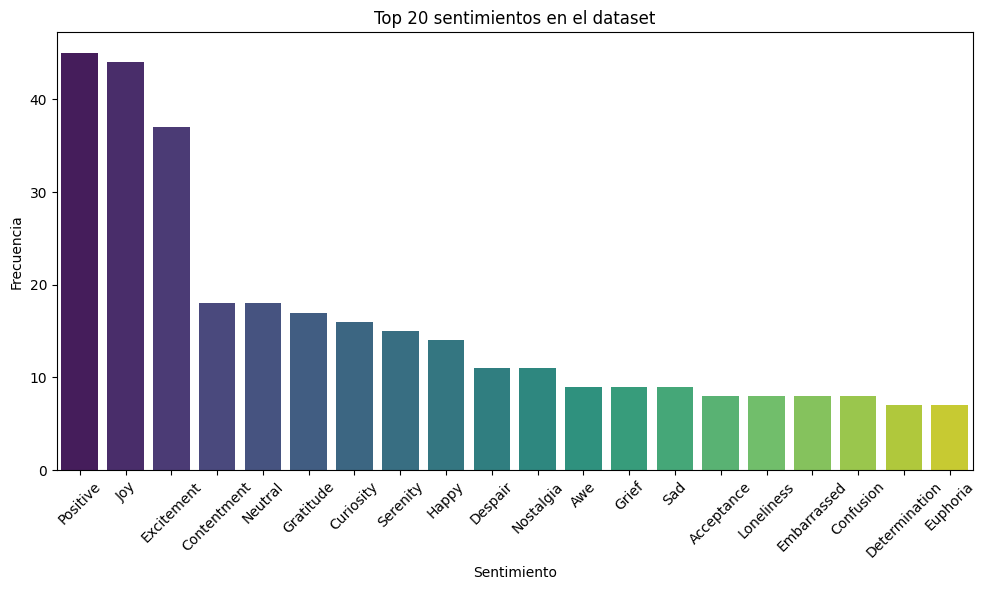

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

top_sentiments = df['Sentiment'].value_counts().head(20)

plt.figure(figsize=(10,6))
sns.barplot(x=top_sentiments.index, y=top_sentiments.values, palette='viridis', hue=top_sentiments.index, legend=False)
plt.title('Top 20 sentimientos en el dataset')
plt.xticks(rotation=45)
plt.ylabel('Frecuencia')
plt.xlabel('Sentimiento')
plt.tight_layout()
plt.show()

### Definimos los sentimientos positivos y los negativos

In [6]:
positive_sentiments = [
    'Positive', 'Happiness', 'Joy', 'Love', 'Amusement', 'Enjoyment', 'Admiration', 'Affection',
    'Awe', 'Surprise', 'Acceptance', 'Adoration', 'Anticipation', 'Calmness', 'Excitement',
    'Kind', 'Pride', 'Elation', 'Euphoria', 'Contentment', 'Serenity', 'Gratitude', 'Hope',
    'Empowerment', 'Compassion', 'Tenderness', 'Arousal', 'Enthusiasm', 'Fulfillment',
    'Reverence', 'Hopeful', 'Proud', 'Grateful', 'Empathetic', 'Compassionate', 'Playful',
    'Free-Spirited', 'Inspired', 'Confident', 'Overjoyed', 'Inspiration', 'Motivation',
    'Satisfaction', 'Blessed', 'Reflection', 'Appreciation', 'Confidence', 'Accomplishment',
    'Wonderment', 'Optimism', 'Enchantment', 'Intrigue', 'Playfuljoy', 'Mindfulness',
    'Dreamchaser', 'Elegance', 'Whimsy', 'Harmony', 'Creativity', 'Radiance', 'Wonder',
    'Rejuvenation', 'Coziness', 'Adventure', 'Melodic', 'Festivejoy', 'Innerjourney',
    'Freedom', 'Dazzle', 'Adrenaline', 'Artisticburst', 'Culinaryodyssey', 'Resilience',
    'Immersion', 'Spark', 'Marvel', 'Positivity', 'Kindness', 'Friendship', 'Success',
    'Exploration', 'Amazement', 'Romance', 'Captivation', 'Tranquility', 'Grandeur',
    'Emotion', 'Energy', 'Celebration', 'Charm', 'Ecstasy', 'Colorful', 'Hypnotic',
    'Connection', 'Iconic', 'Journey', 'Engagement', 'Touched', 'Triumph', 'Heartwarming',
    'Solace', 'Breakthrough', 'Joy In Baking', 'Envisioning History', 'Imagination',
    'Vibrancy', 'Mesmerizing', 'Culinary Adventure', 'Winter Magic', 'Thrilling Journey',
    "Nature'S Beauty", 'Celestial Wonder', 'Creative Inspiration', 'Runway Creativity',
    "Ocean'S Freedom", 'Whispers Of The Past', 'Relief'
]

negative_sentiments = [
    'Negative', 'Anger', 'Fear', 'Sadness', 'Disgust', 'Disappointed', 'Bitter', 'Confusion',
    'Shame', 'Despair', 'Grief', 'Loneliness', 'Jealousy', 'Resentment', 'Frustration',
    'Boredom', 'Anxiety', 'Intimidation', 'Helplessness', 'Envy', 'Regret', 'Indifference',
    'Numbness', 'Melancholy', 'Ambivalence', 'Bitterness', 'Yearning', 'Fearful',
    'Apprehensive', 'Overwhelmed', 'Jealous', 'Devastated', 'Frustrated', 'Envious',
    'Dismissive', 'Bittersweet', 'Pensive', 'Heartbreak', 'Betrayal', 'Suffering',
    'Emotionalstorm', 'Isolation', 'Disappointment', 'Lostlove', 'Exhaustion', 'Sorrow',
    'Darkness', 'Desperation', 'Ruins', 'Desolation', 'Loss', 'Heartache', 'Solitude',
    'Obstacle', 'Sympathy', 'Pressure', 'Miscalculation', 'Challenge', 'Sad', 'Hate', 'Bad',
    'Embarrassed'
]

# Creamos un mapa de polaridad para clasificar los sentimientos
def polarity_map(sentiment):
    if sentiment in positive_sentiments:
        return 'Positive'
    elif sentiment in negative_sentiments:
        return 'Negative'
    else:
        return None  # ignoramos sentimientos no clasificados
    
df['Polarity'] = df['Sentiment'].apply(polarity_map)

# Filtramos los sentimientos que no tienen polaridad definida
df = df[df['Polarity'].notnull()]

# Guardamos el DataFrame limpio y con polaridad
df = df[['Clean_Text', 'Polarity']]

df.head(10)

,Clean_Text,Polarity
0,enjoying a beautiful day at the park,Positive
1,traffic was terrible this morning,Negative
2,just finished an amazing workout,Positive
3,excited about the upcoming weekend getaway,Positive
5,feeling grateful for the little things in life,Positive
6,rainy days call for cozy blankets and hot cocoa,Positive
7,the new movie release is a mustwatch,Positive
8,political discussions heating up on the timeline,Negative
10,just published a new blog post check it out,Positive
11,feeling a bit under the weather today,Negative


### Añadimos el campo de referencia para entrenar al modelo

In [7]:
df['Binary'] = df['Polarity'].map({'Positive': 1, 'Negative': 0})

df.head(10)

,Clean_Text,Polarity,Binary
0,enjoying a beautiful day at the park,Positive,1
1,traffic was terrible this morning,Negative,0
2,just finished an amazing workout,Positive,1
3,excited about the upcoming weekend getaway,Positive,1
5,feeling grateful for the little things in life,Positive,1
6,rainy days call for cozy blankets and hot cocoa,Positive,1
7,the new movie release is a mustwatch,Positive,1
8,political discussions heating up on the timeline,Negative,0
10,just published a new blog post check it out,Positive,1
11,feeling a bit under the weather today,Negative,0


### Vectorizamos el contenido de las publicaciones

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

x = vectorizer.fit_transform(df['Clean_Text'])

y = df['Binary']

### Creamos y entrenamos el modelo de regresion logistica

In [9]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=5000)

model.fit(x, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,5000
,multi_class,'deprecated'


### Simulamos un dato vectorizado para probar el modelo entrenado

In [10]:
# Mensaje positivo de ejemplo
text_positive = "I love the new features in the latest update! They make everything so much easier and more enjoyable."

# Mensaje negativo de ejemplo
text_negative = "I am really disappointed with the service I received. It was slow and unhelpful."

text_positive_vec = vectorizer.transform([text_positive])

text_negative_vec = vectorizer.transform([text_negative])

### Prueba de predicción del modelo

In [11]:
# Prueba de la polaridad del mensaje
positive_prediction = model.predict(text_positive_vec)
negative_prediction = model.predict(text_negative_vec)

print(f"Mensaje positivo: {text_positive}")
print(f"Predicción: {'Positivo' if positive_prediction[0] == 1 else 'Negativo'}")
print(f"Mensaje negativo: {text_negative}")
print(f"Predicción: {'Positivo' if negative_prediction[0] == 1 else 'Negativo'}")

Mensaje positivo: I love the new features in the latest update! They make everything so much easier and more enjoyable.
Predicción: Positivo
Mensaje negativo: I am really disappointed with the service I received. It was slow and unhelpful.
Predicción: Negativo


### Visualización

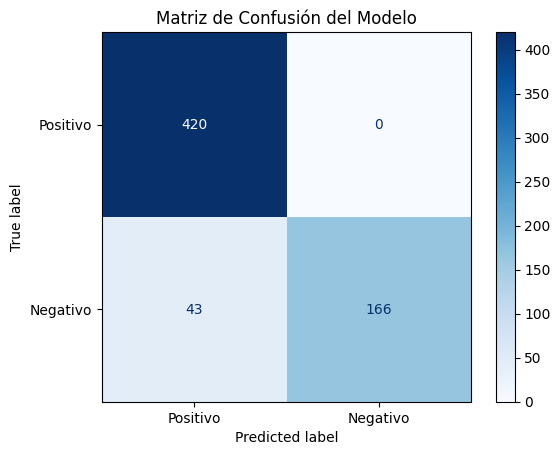

In [16]:
# Graficar modelo con las predicciones
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Generar predicciones para el conjunto de datos
y_pred = model.predict(x)
# Calcular la matriz de confusión
cm = confusion_matrix(y, y_pred, labels=[1, 0])
# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Positivo', 'Negativo'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión del Modelo')
plt.show()